 <a id="2"></a>
<h1 style='background:#41BEB9;padding-top:17px; border:0; color:black'><center>Libraries</center></h1> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

> # <center>🔥 EDA - VIDEO GAMES SALES 🎮</center>

---

> <center><img src="https://giffiles.alphacoders.com/162/162991.gif"></center>

---

 <a id="2"></a>
<h1 style='background:#41BEB9;padding-top:17px; border:0; color:black'><center>Import Data</center></h1> 

In [2]:
df = pd.read_csv('vgsales.csv')

 <a id="2"></a>
<h1 style='background:#41BEB9;padding-top:17px; border:0; color:black'><center>Reading Data</center></h1> 

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Their fields and data types are:**

   * Rank - Ranking of overall sales, integer
   
   * Name - The games name

   * Platform - Platform of the games release (i.e. PC,PS4, etc.), object

   * Year - Year of the game's release, float

   * Genre - Genre of the game ,object

   * Publisher - Publisher of the game, object

   * NA_Sales - Sales in North America (in millions), float

   * EU_Sales - Sales in Europe (in millions), float

   * JP_Sales - Sales in Japan (in millions), float

   * Other_Sales - Sales in the rest of the world (in millions), float

   * Global_Sales - Total worldwide sales, float



In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

 <a id="2"></a>
<h1 style='background:#41BEB9;padding-top:17px; border:0; color:black'><center>Exploratory Data Analysis (EDA)</center></h1> 

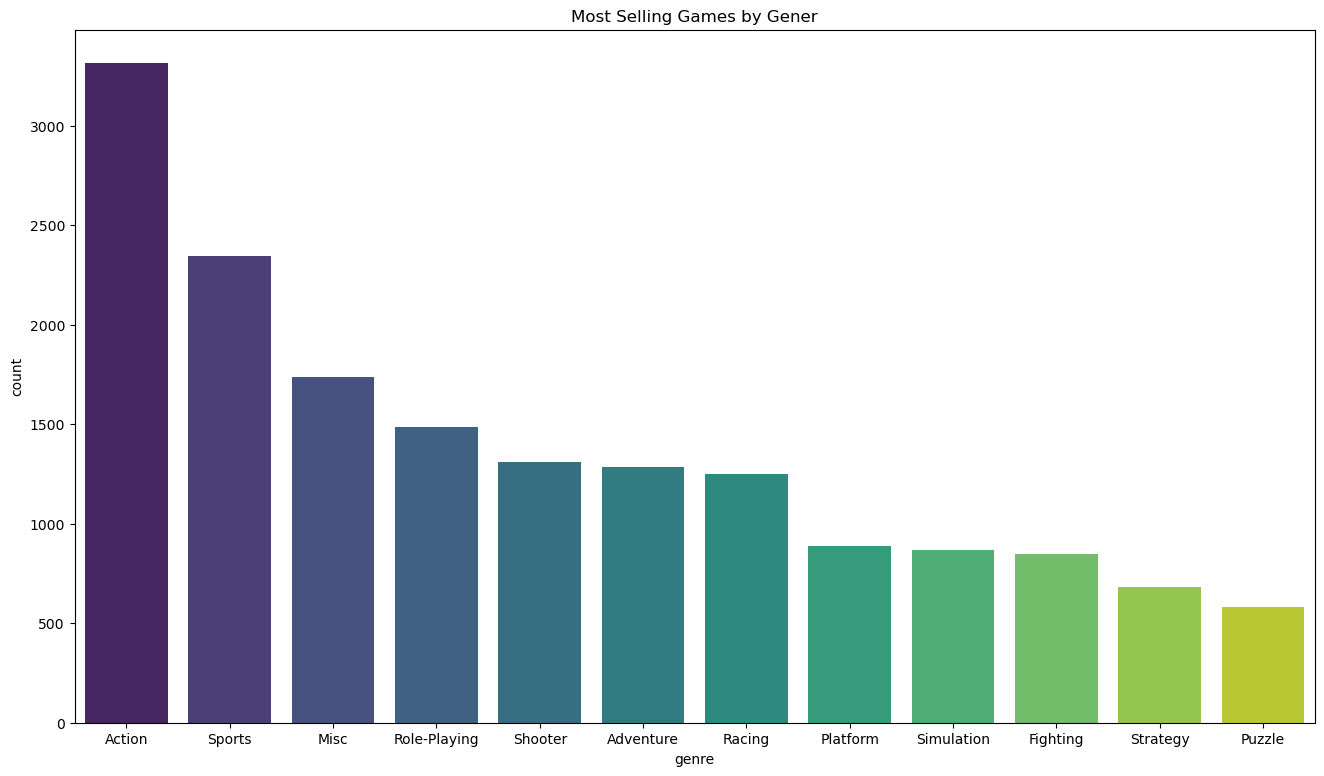

In [6]:
df_genre = df['genre'].value_counts().rename_axis('genre').reset_index(name='count')

plt.figure(figsize=(16,9))
plt.title('Most Selling Games by Gener')
sns.barplot(data=df_genre, x='genre', y='count', order=df_genre['genre'], palette='viridis')
plt.show()

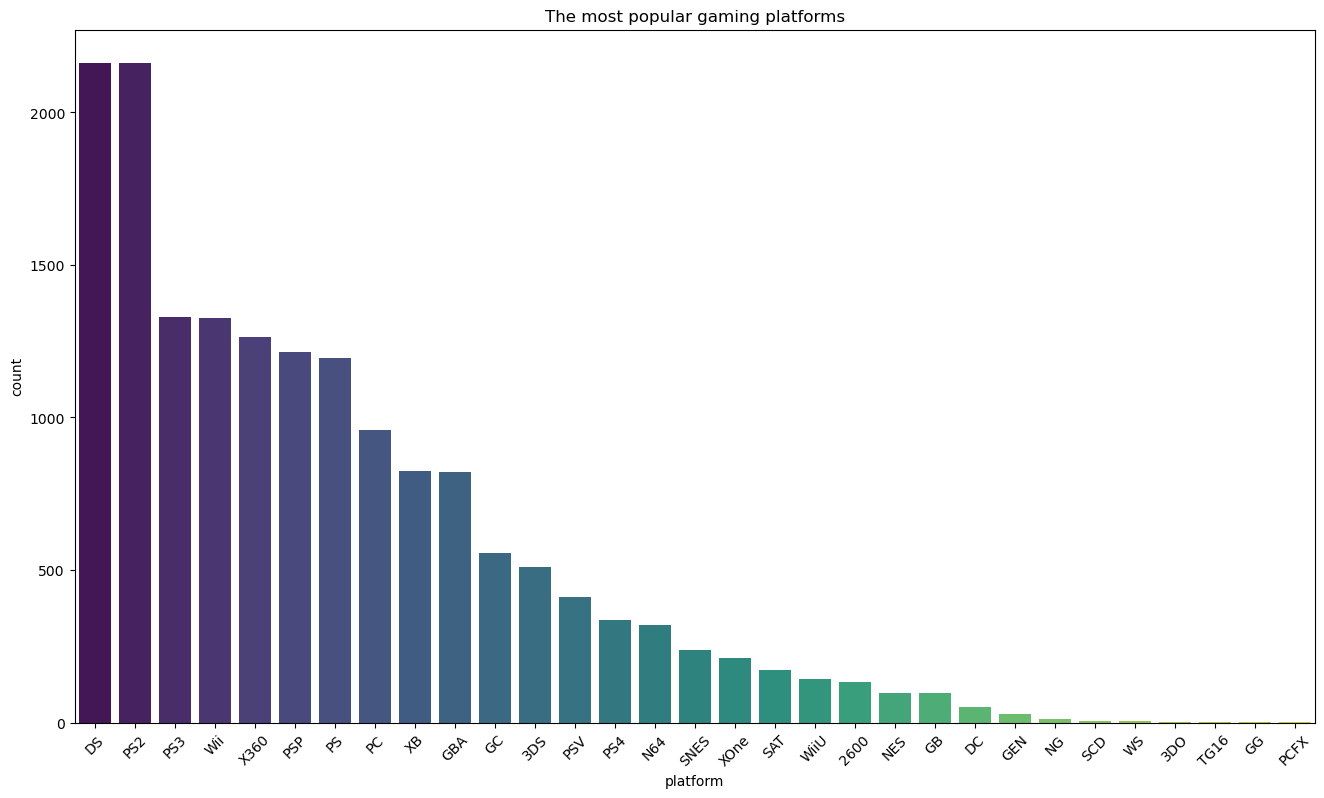

In [7]:
plt.figure(figsize=(16,9))
plt.title('The most popular gaming platforms')
sns.countplot(data=df, x='platform', order=df['platform'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.show()

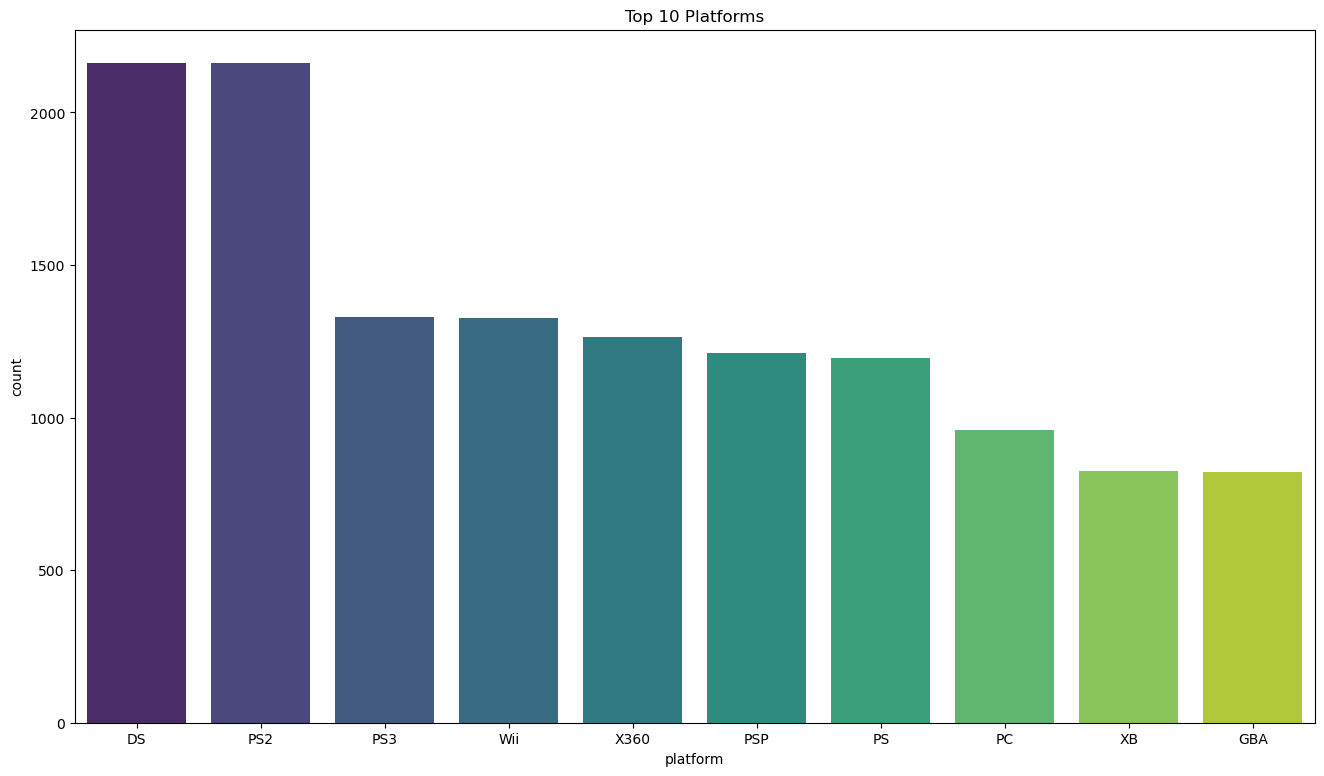

In [8]:
df_platforms = df['platform'].value_counts().rename_axis('platform').nlargest(10).reset_index(name='count')

plt.figure(figsize=(16,9))
plt.title('Top 10 Platforms')

sns.barplot(data=df_platforms, x='platform', y='count', order=df_platforms['platform'], palette='viridis')
plt.show()

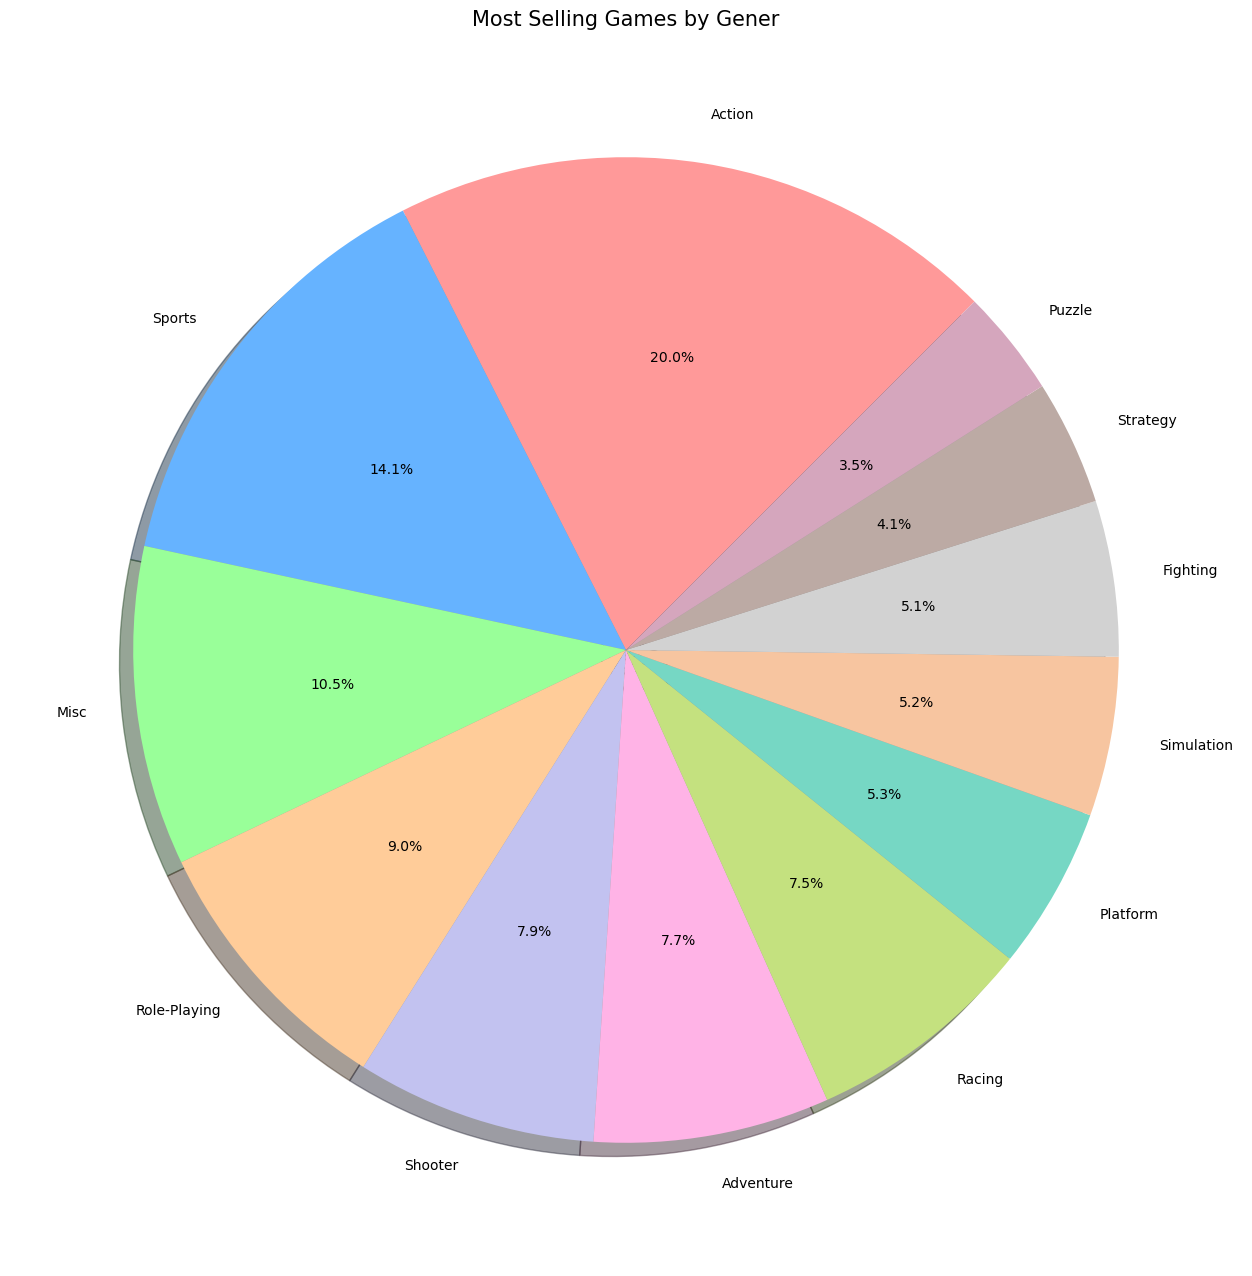

In [9]:
labels = df["genre"].value_counts().index
sizes = df["genre"].value_counts()
# Expanded color list for 12 variables
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#c4e17f', '#76d7c4', '#f7c5a0', '#d2d2d2', '#bcaaa4', '#d5a6bd']

plt.figure(figsize=(16,16))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%', colors=colors, shadow=True, startangle=45)
plt.title('Most Selling Games by Gener', color='Black', fontsize=15)

plt.show()

In [10]:
df_year = df[['year']].value_counts().rename_axis('year').reset_index(name='count')
df_year['year'] = df_year['year'].astype(int)


In [11]:
#Deleted some incomplete data.
drop_row_index = df_year[df_year['year'] > 2015].index
df_year = df_year.drop(drop_row_index)

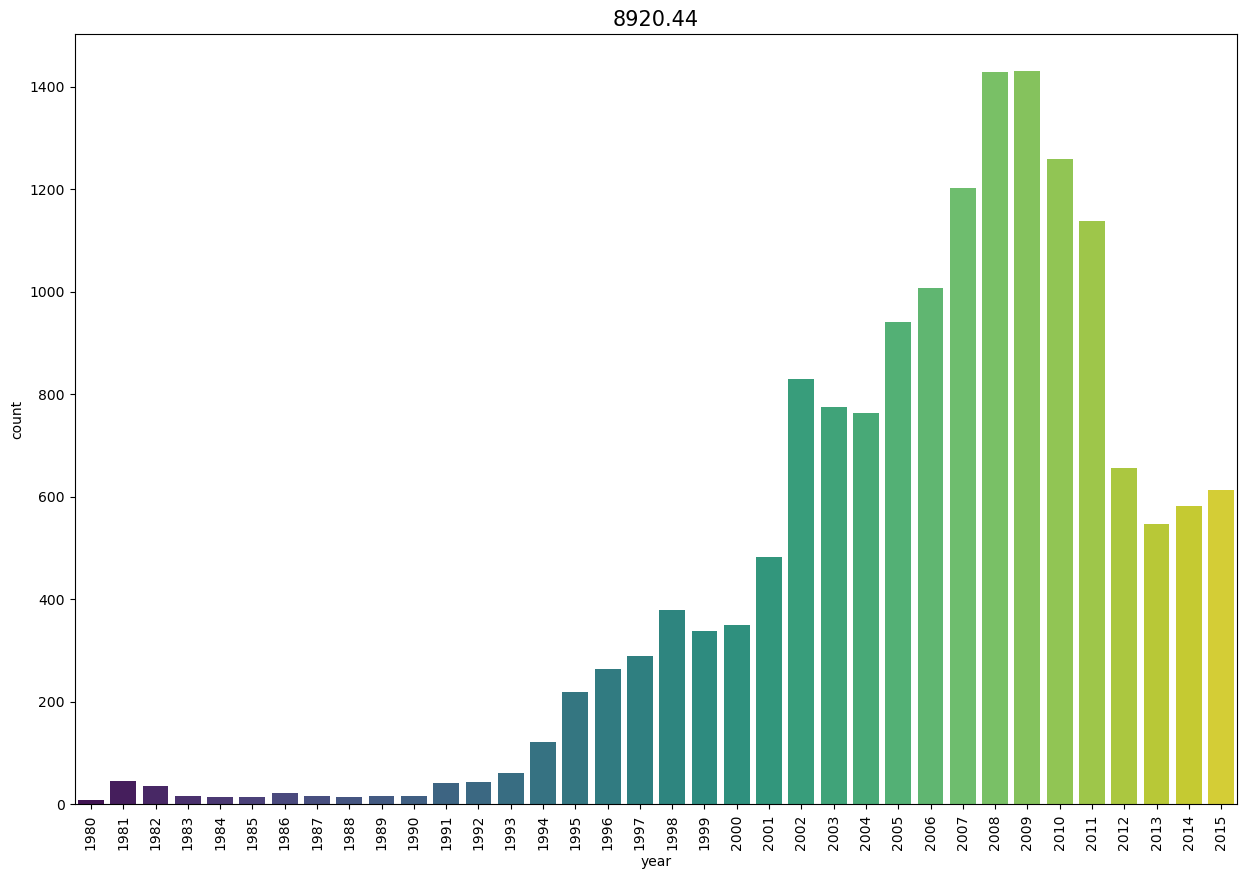

In [12]:
top_year = df_year.loc[df_year['count'].idxmax(), 'year']

plt.figure(figsize=(15, 10))
sns.barplot(data=df_year, x='year', y='count', palette='viridis')
plt.xticks(rotation=90)
plt.title(df['global_sales'].sum(), color='Black', fontsize=15)
plt.show()

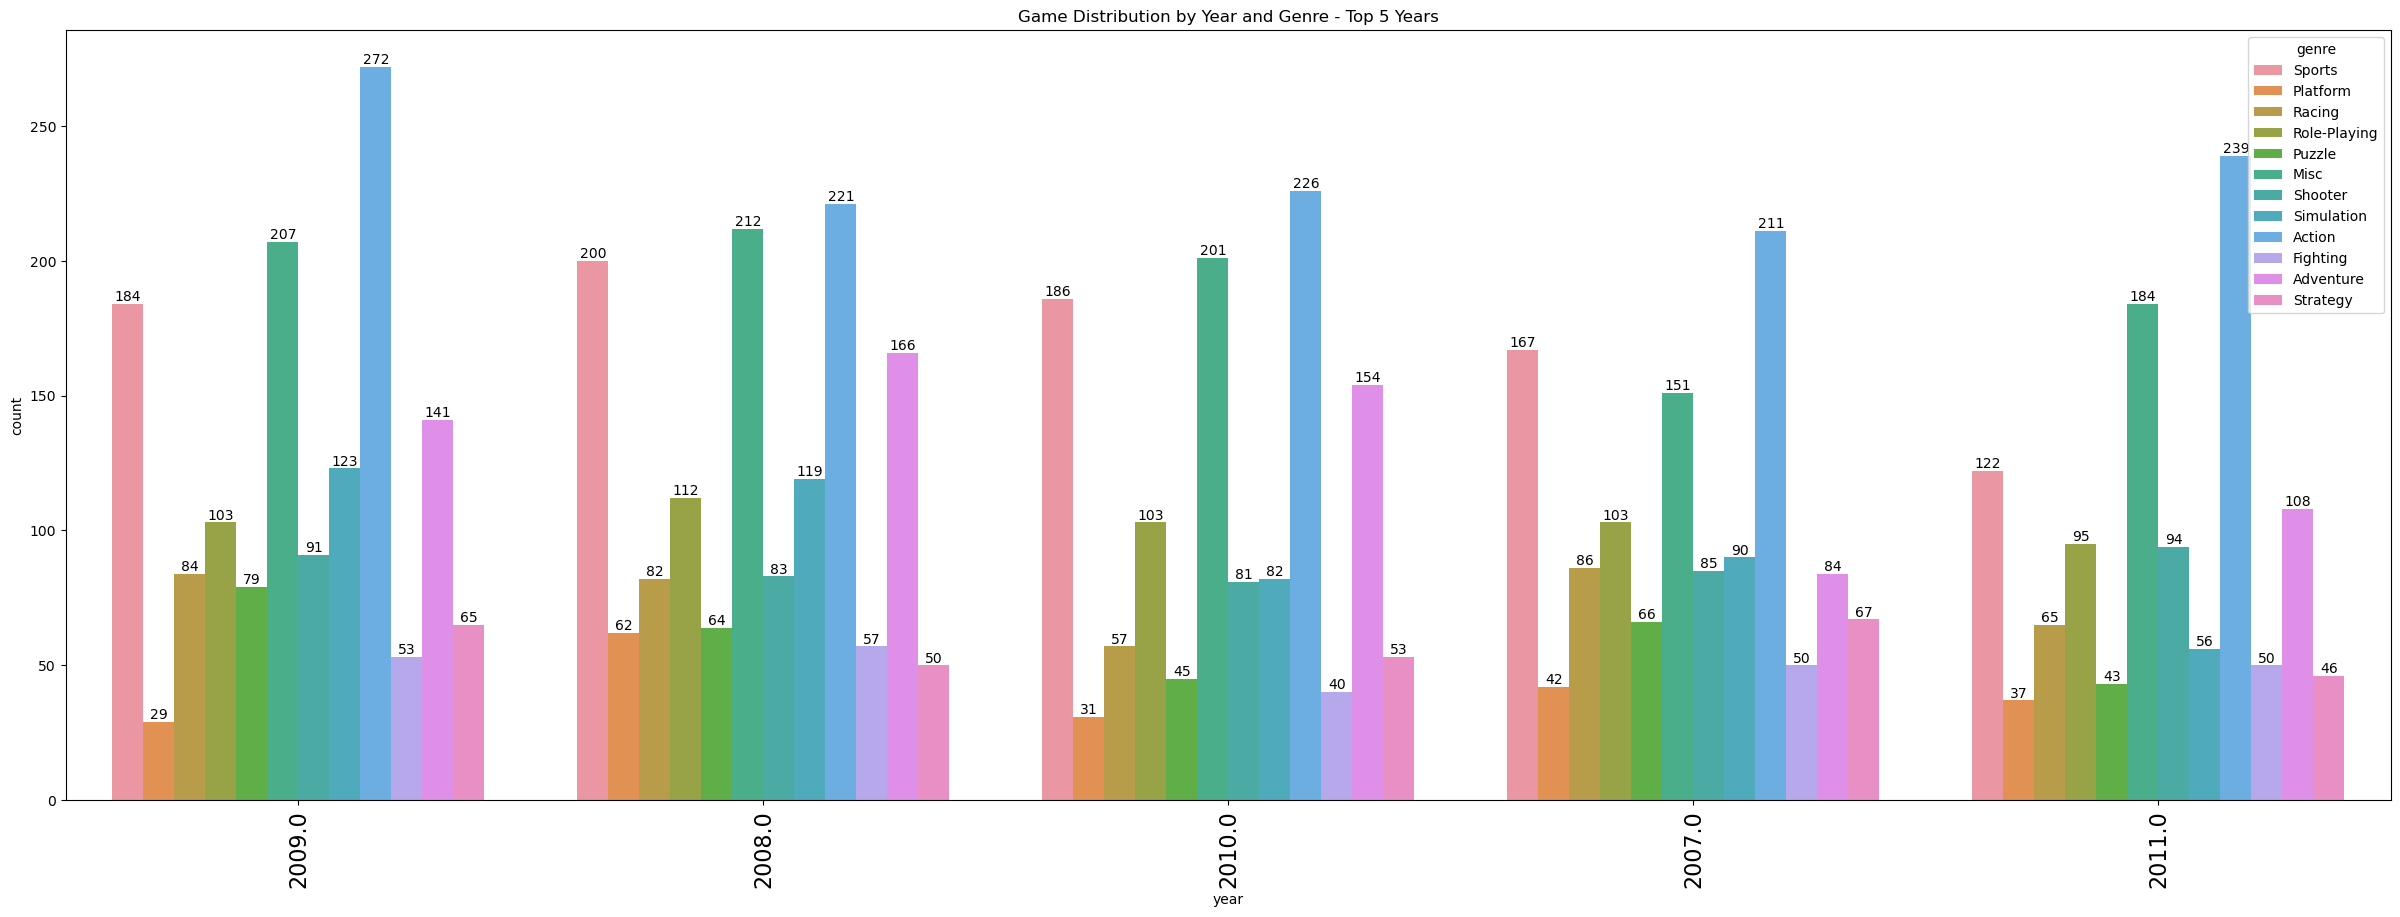

In [13]:
# Determine the top 5 years
df_top_years = df['year'].value_counts().iloc[:5].index

# Create the count plot
plt.figure(figsize=(30, 10))
ax = sns.countplot(x="year", data=df, hue='genre', order=df_top_years)
plt.xticks(size=16, rotation=90)

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('Game Distribution by Year and Genre - Top 5 Years')
plt.show()


# The highest selling video game

In [14]:
df_genre_sale = df.head(20)
df_genre_sale = df_genre_sale[['name', 'year', 'genre', 'global_sales']]
df_genre_sale = df_genre_sale.sort_values(by=['global_sales'], ascending=False)

name = df_genre_sale['name']
year = df_genre_sale['year']
y = np.arange(0, 20)

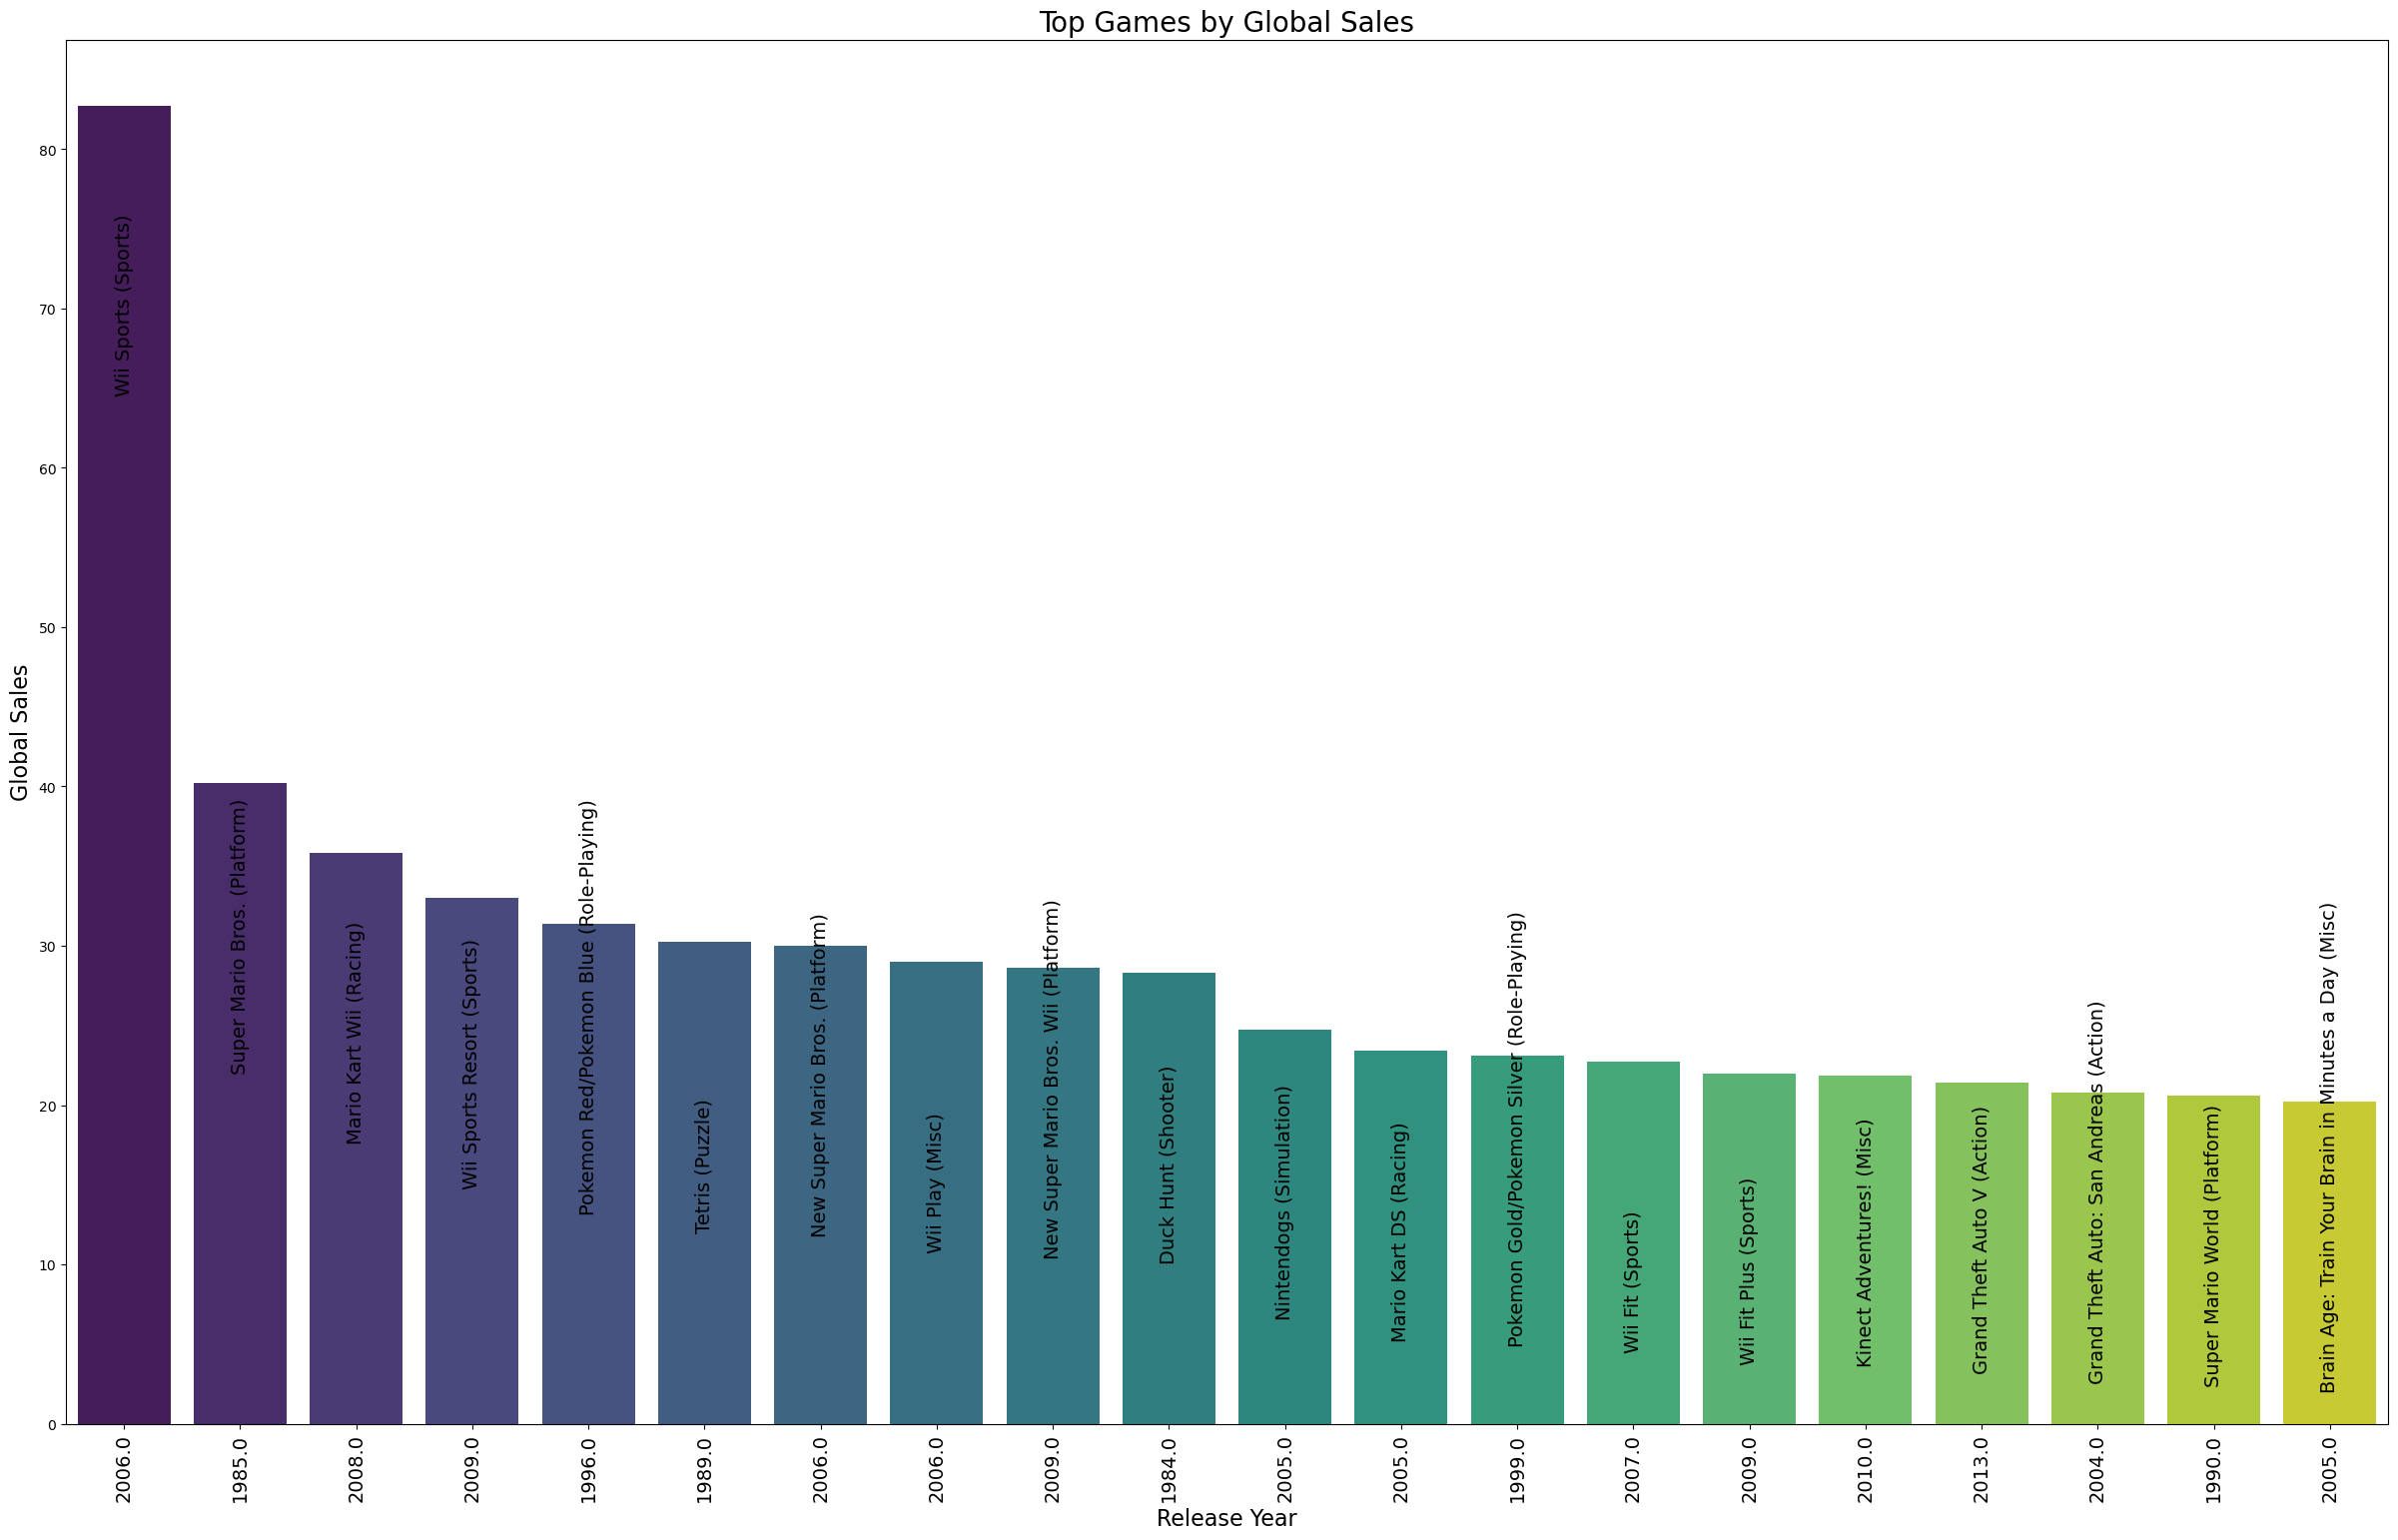

In [15]:
plt.figure(figsize=(30, 18))

ax = sns.barplot(x='name', y='global_sales', data=df_genre_sale, palette='viridis')


for index, value in enumerate(df_genre_sale['global_sales']):
    game_info = f"{df_genre_sale['name'][index]} ({df_genre_sale['genre'][index]})"
    ax.text(index, value - 18, game_info, color='#000', size=14, rotation=90, ha="center")
    
plt.xticks(y, df_genre_sale['year'], fontsize=14, rotation=90)

plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Global Sales', fontsize=16)
plt.title('Top Games by Global Sales', fontsize=20)

plt.show()


C:\Users\midoe\AppData\Local\Temp\ipykernel_25832\2776931018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


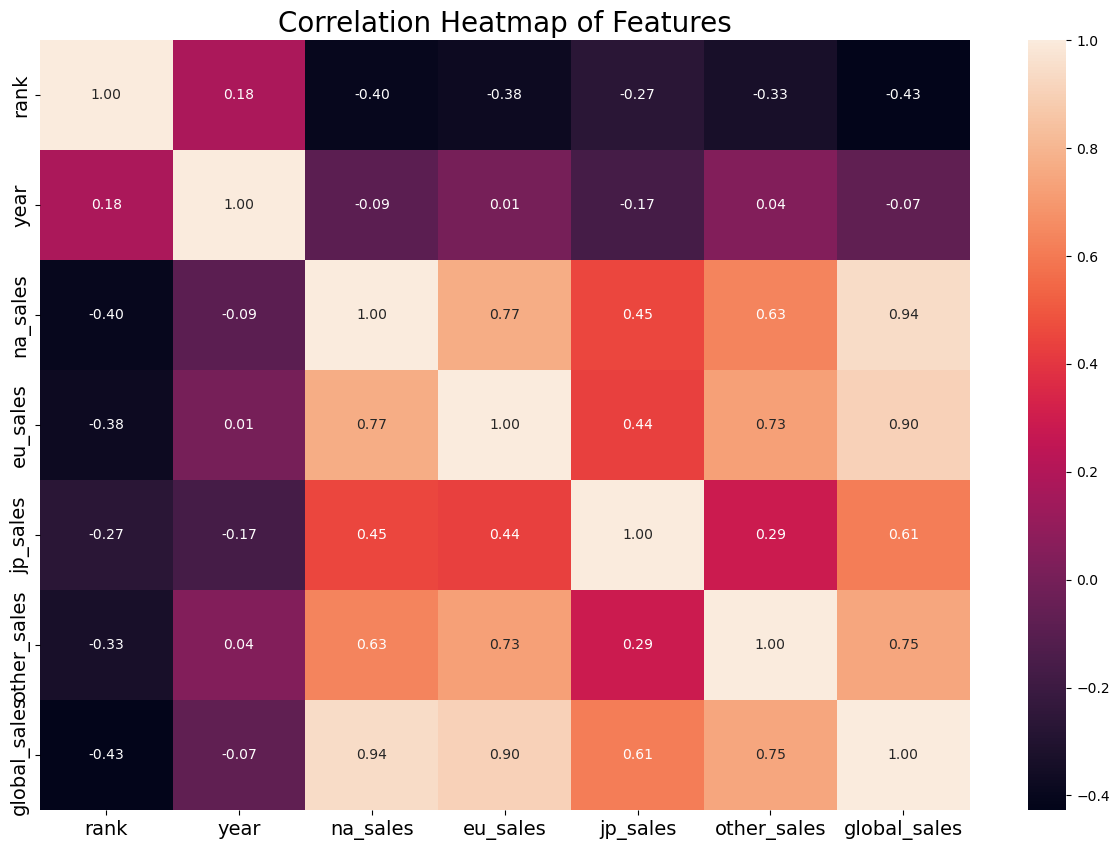

In [16]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, annot=True, fmt=".2f", ax=ax)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_title('Correlation Heatmap of Features', fontsize=20)

plt.show()


# Genre

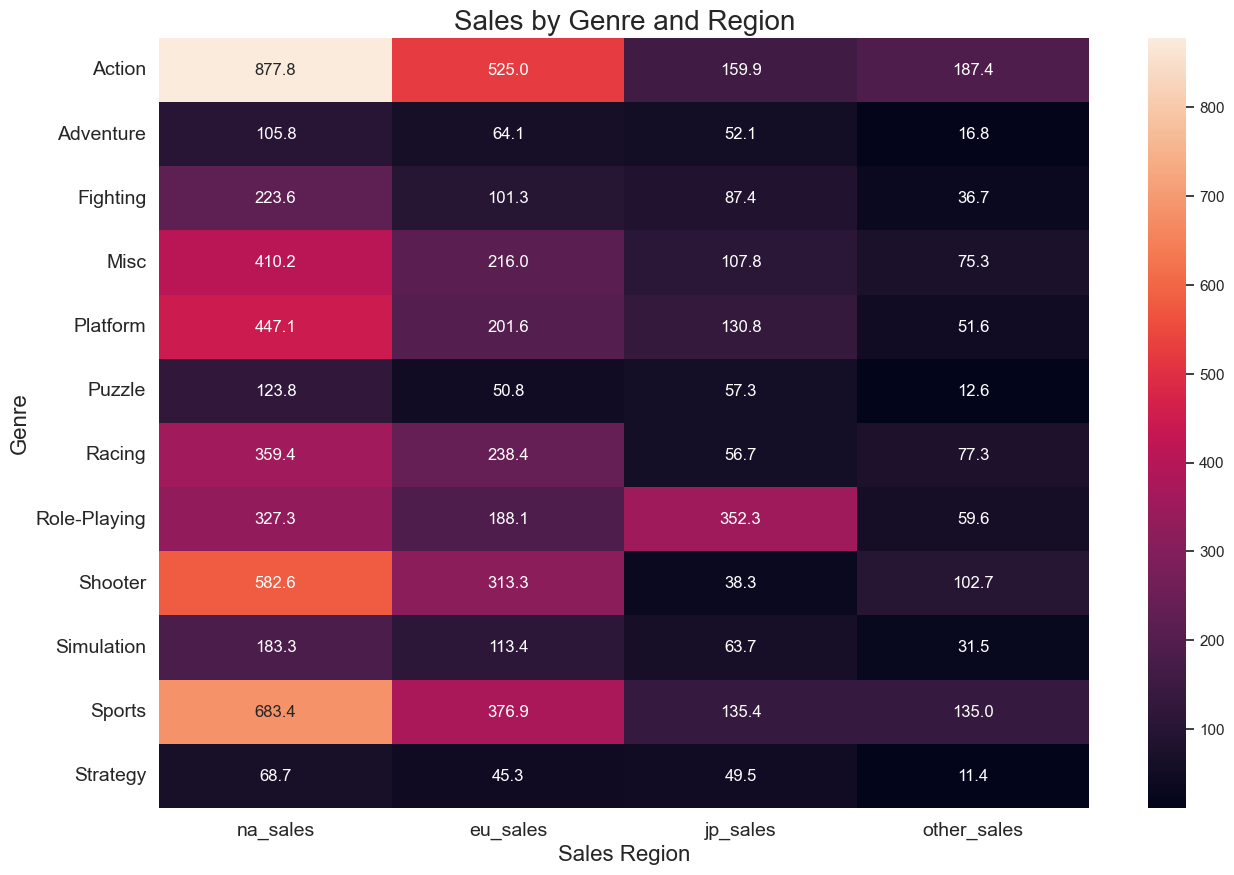

In [17]:
comp_genre = df[['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

comp_map = comp_genre.groupby(by=['genre']).sum()

sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(comp_map, annot=True, fmt='.1f', ax=ax)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel('Sales Region', fontsize=16)
ax.set_ylabel('Genre', fontsize=16)
ax.set_title('Sales by Genre and Region', fontsize=20)

plt.show()

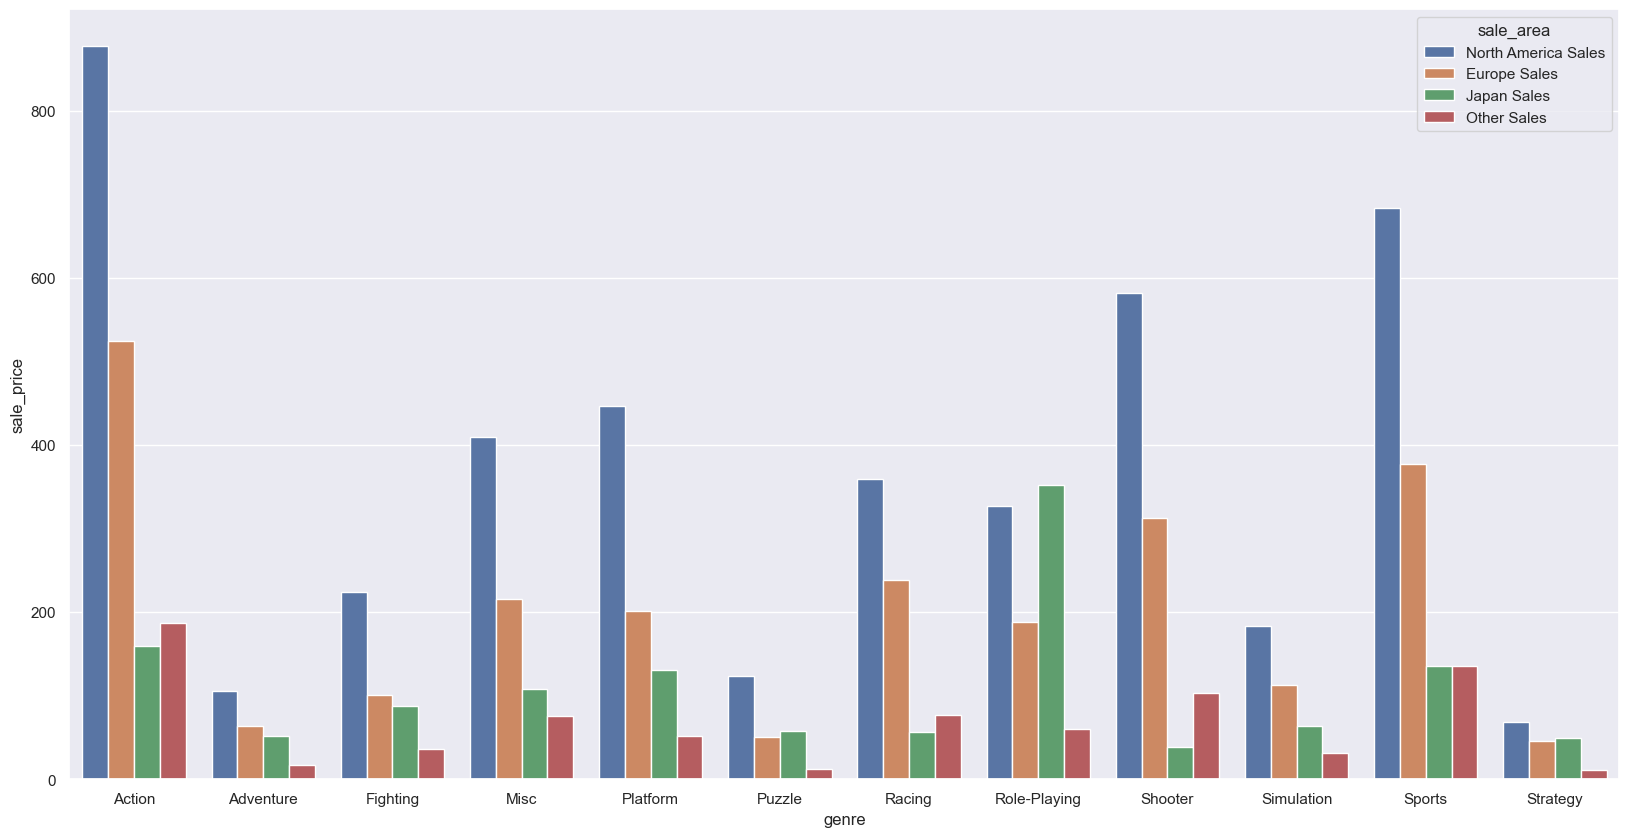

In [18]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['genre'], value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], var_name='sale_area', value_name='sale_price')

plt.figure(figsize=(20, 10))
ax = sns.barplot(x='genre', y='sale_price', hue='sale_area', data=comp_table)


new_labels = ['North America Sales', 'Europe Sales', 'Japan Sales', 'Other Sales']
for t, l in zip(ax.legend_.texts, new_labels): t.set_text(l)

plt.show()


# publishers

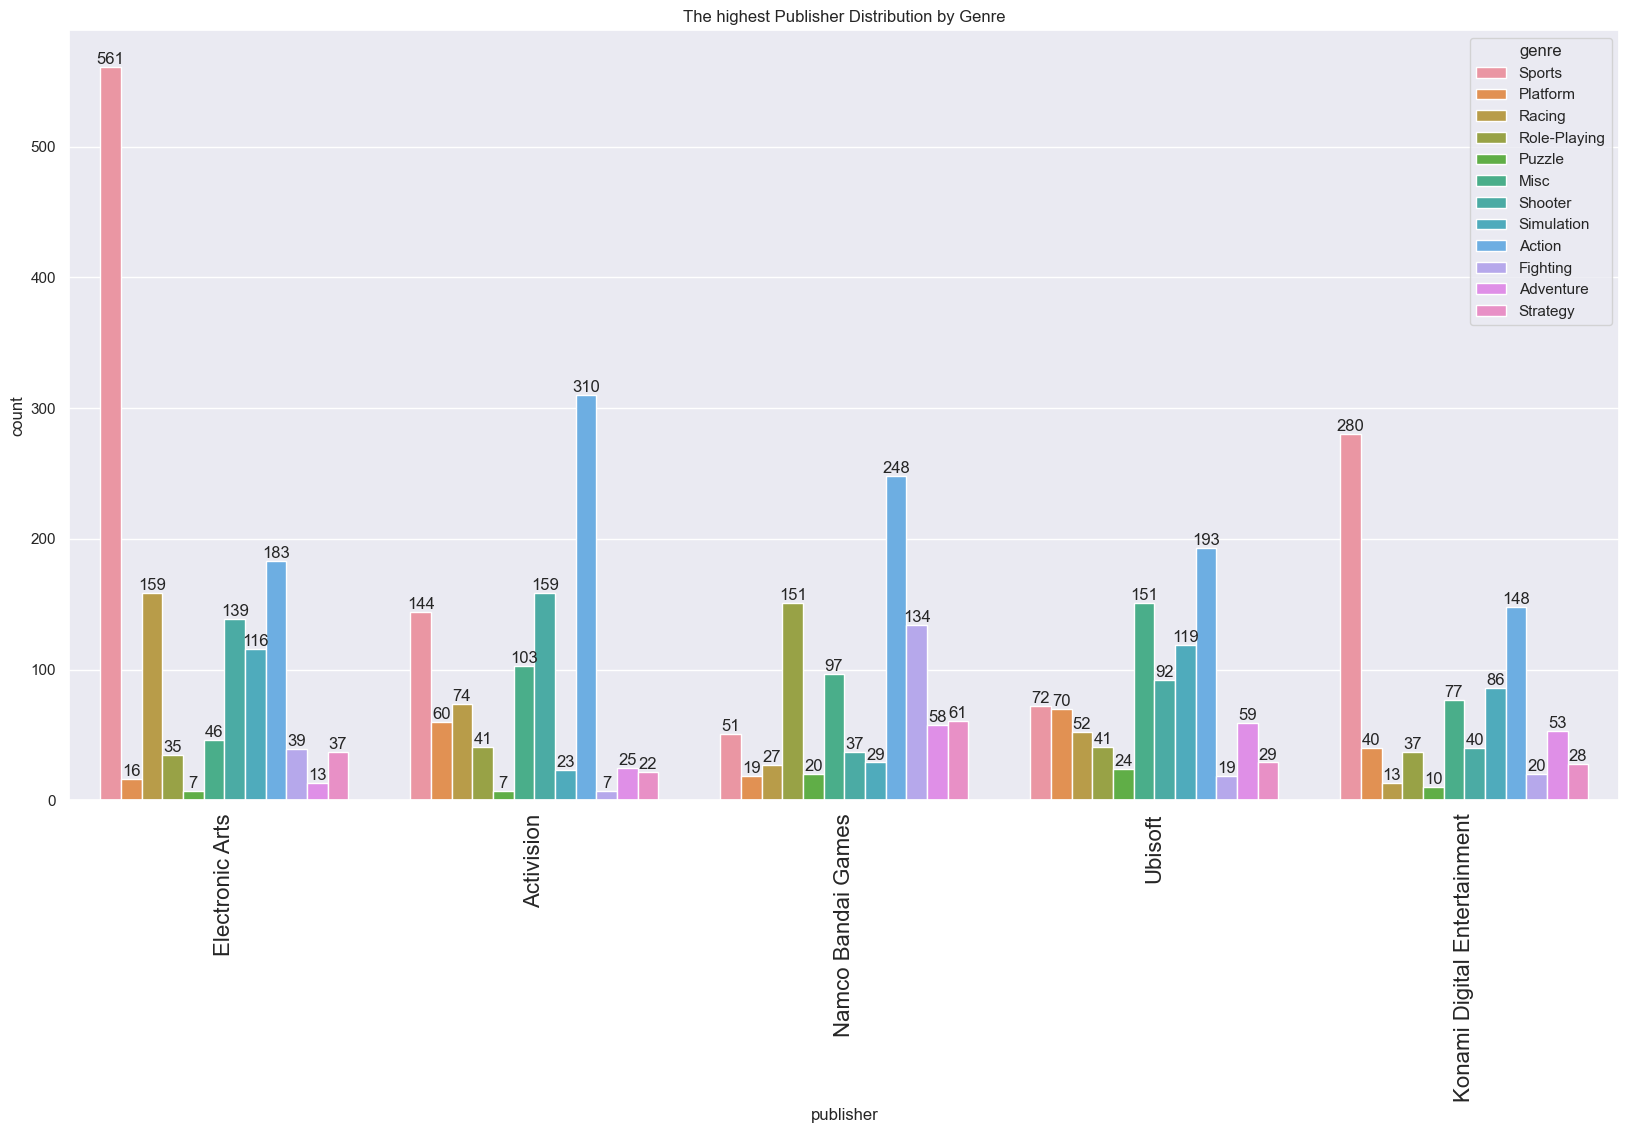

In [19]:
df_Publisher = df['publisher'].value_counts().iloc[:5].index
plt.figure(figsize=(20, 10))
ax = sns.countplot(x="publisher", data=df, hue='genre', order=df_Publisher)
plt.xticks(size=16, rotation=90)

for container in ax.containers:
    ax.bar_label(container)

plt.title('The highest Publisher Distribution by Genre')
plt.show()

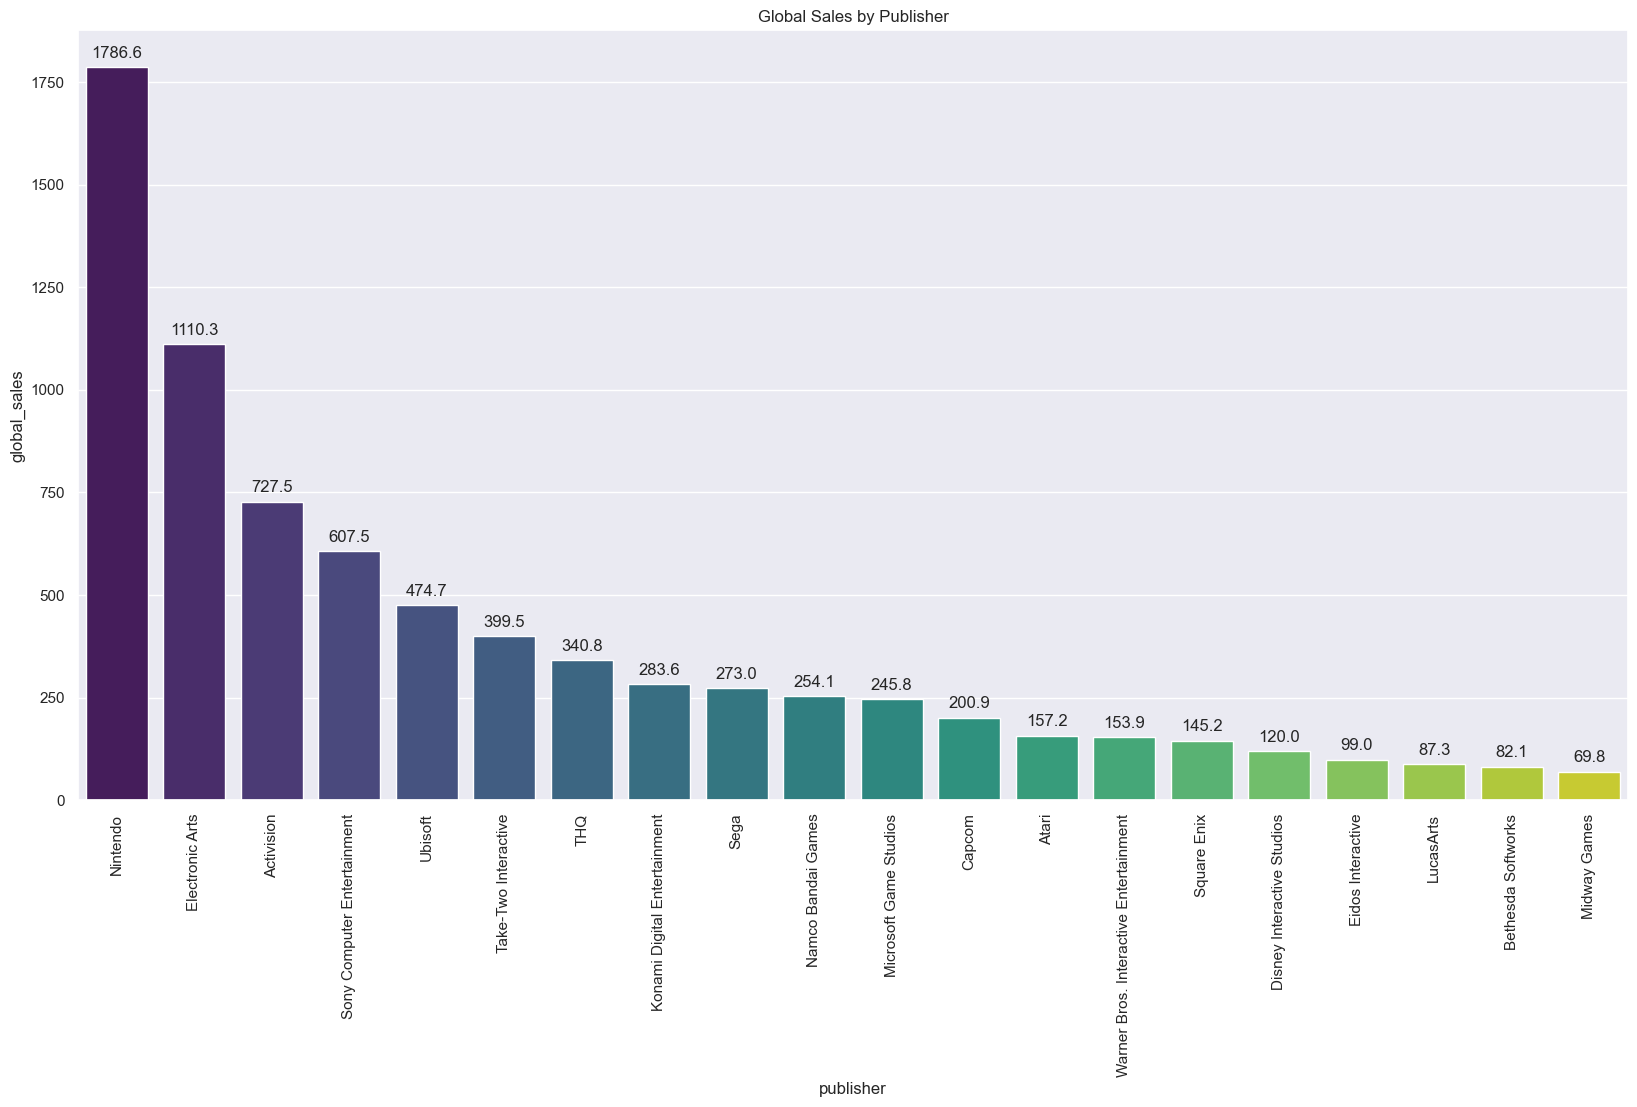

In [20]:
df_publisher_sale = (df[['publisher', 'global_sales']].groupby('publisher')['global_sales'].sum()
                     .sort_values(ascending=False).head(20).reset_index())

plt.figure(figsize=(20, 10))
ax = sns.barplot(x='publisher', y='global_sales', data=df_publisher_sale, color='b', palette='viridis')
plt.xticks(rotation=90)

# Adding title
plt.title('Global Sales by Publisher')

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()


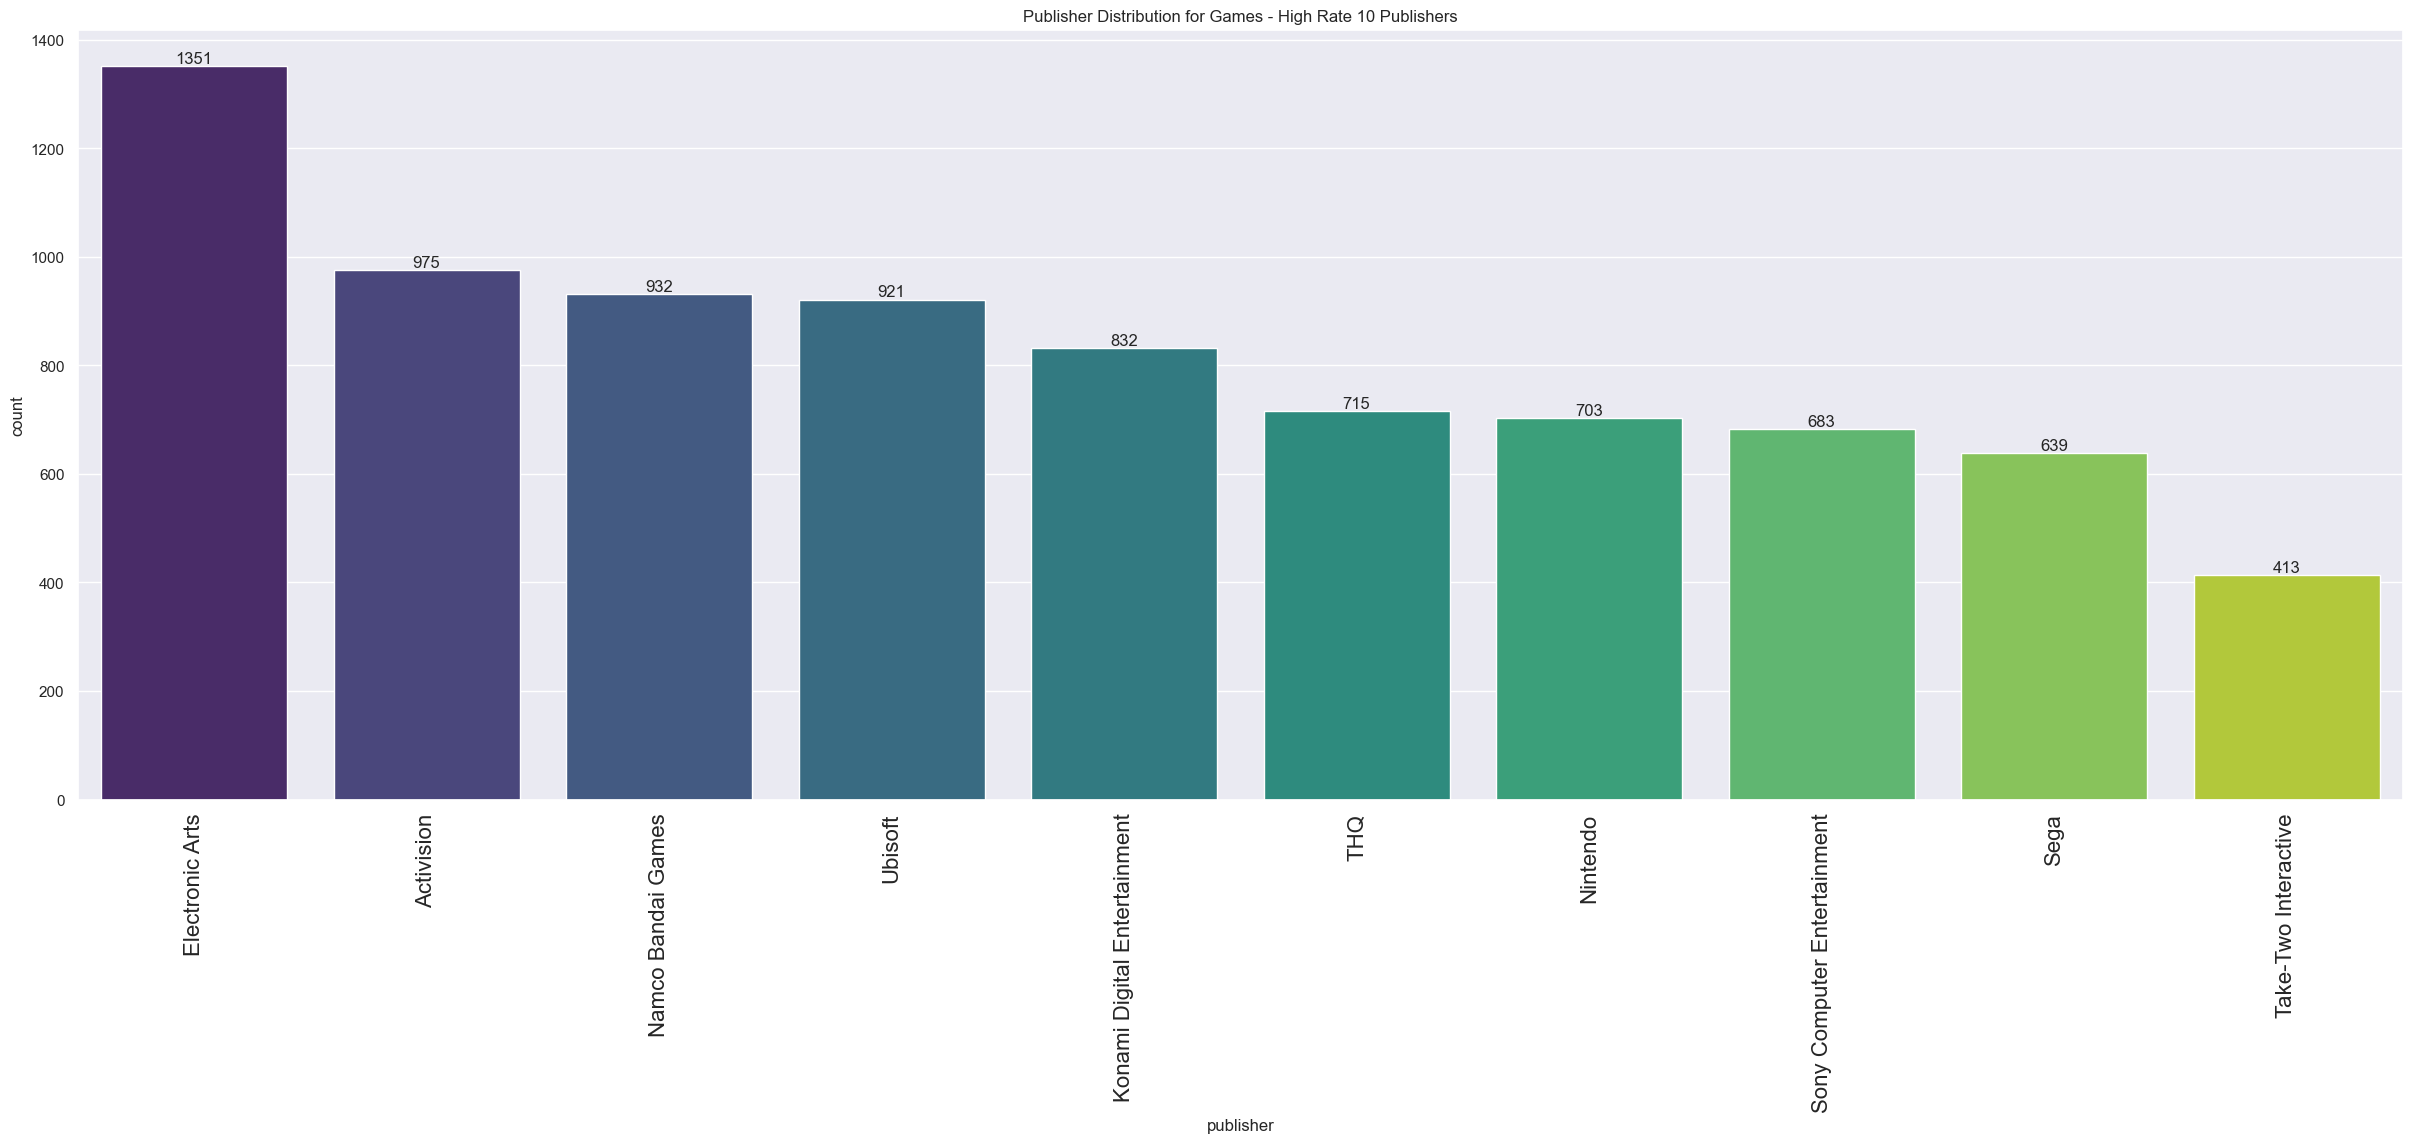

In [21]:
top_rate_Publisher = df['publisher'].value_counts().head(10).index
filtered_data = df[df['publisher'].isin(top_rate_Publisher)]

plt.figure(figsize=(30, 10))
ax = sns.countplot(x="publisher", data=filtered_data, palette='viridis',order=filtered_data['publisher'].value_counts().index)

plt.xticks(size=16, rotation=90)
ax.bar_label(ax.containers[0])

plt.title('Publisher Distribution for Games - High Rate 10 Publishers')

plt.show()


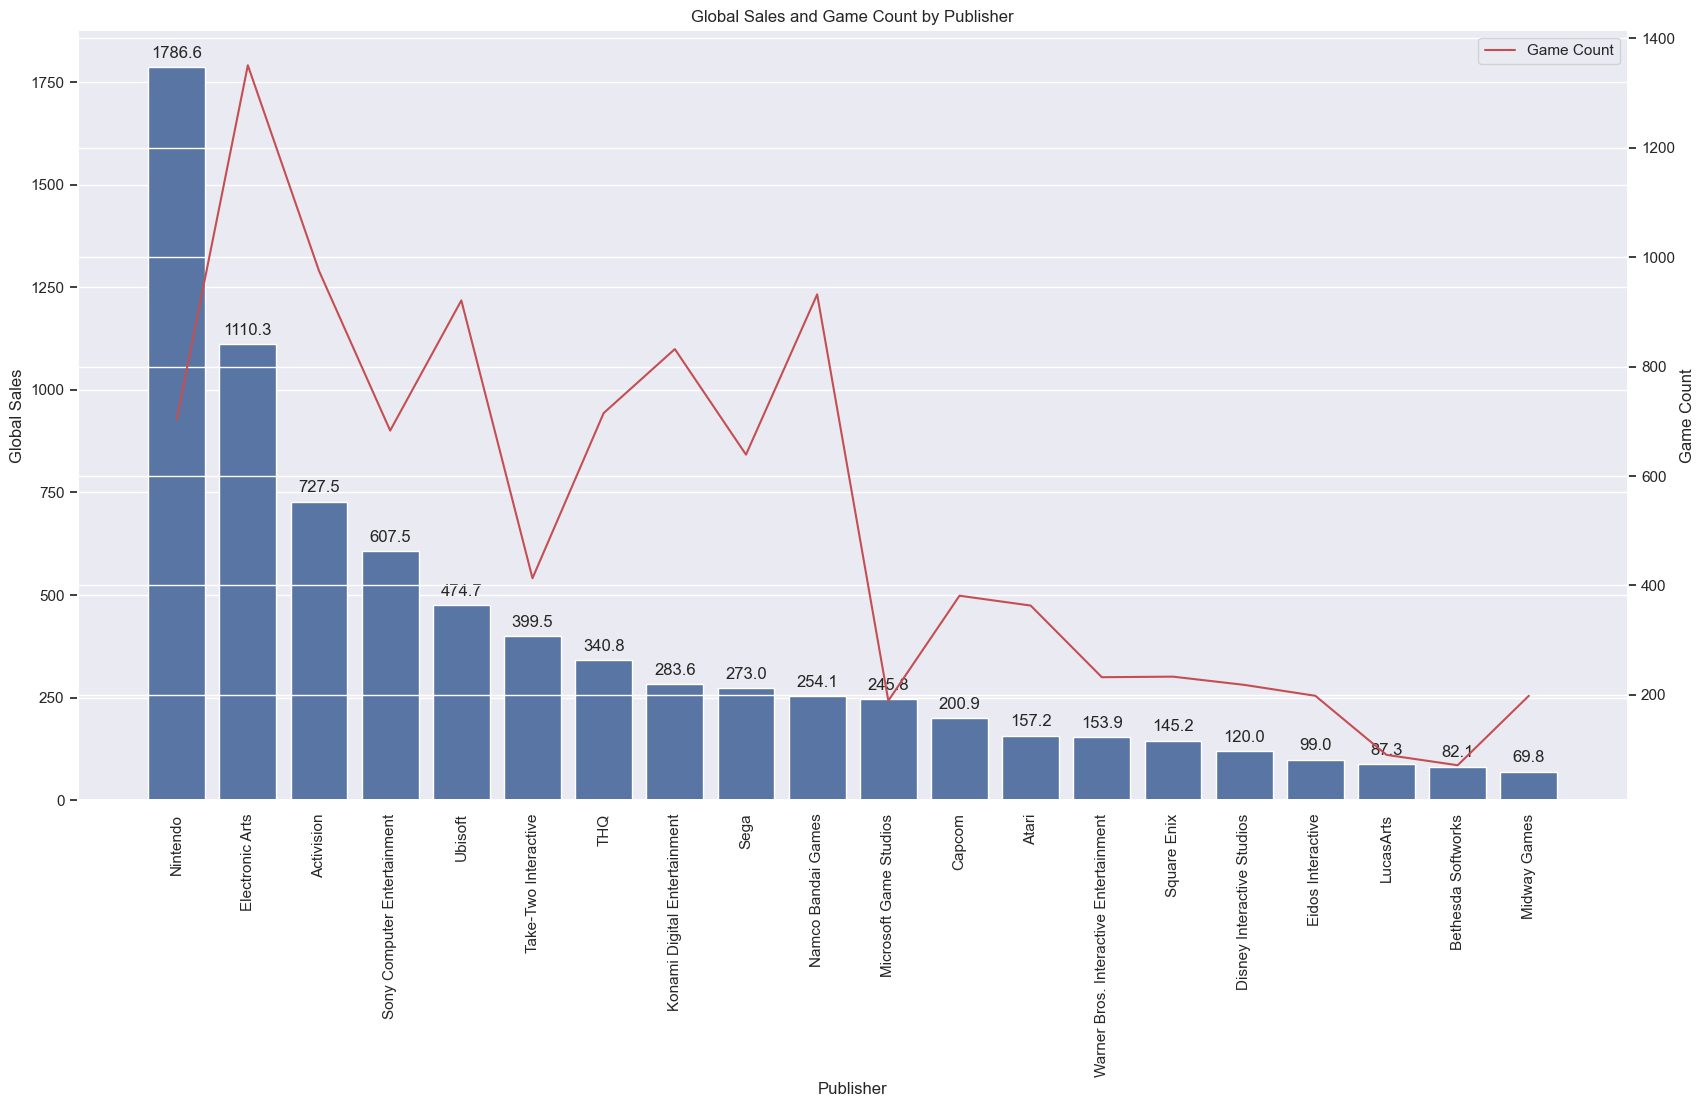

In [22]:
publisher_game_counts = df['publisher'].value_counts().reset_index()
publisher_game_counts.columns = ['publisher', 'game_count']

df_publisher_sale_counts = pd.merge(df_publisher_sale, publisher_game_counts, on='publisher')

fig, ax1 = plt.subplots(figsize=(20, 10))

chart = sns.barplot(x='publisher', y='global_sales', data=df_publisher_sale_counts, ax=ax1, color='b', label='Global Sales')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Publisher')
ax1.set_ylabel('Global Sales')

for p in chart.patches:
    chart.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

ax2 = ax1.twinx()
sns.lineplot(x='publisher', y='game_count', data=df_publisher_sale_counts, ax=ax2, color='r', label='Game Count')
ax2.set_ylabel('Game Count')

plt.legend()

plt.title('Global Sales and Game Count by Publisher')
plt.show()


In [23]:
corr_publisher = df[['publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','global_sales']]
corr_publisher = corr_publisher.groupby(by=['publisher']).sum().head(20)

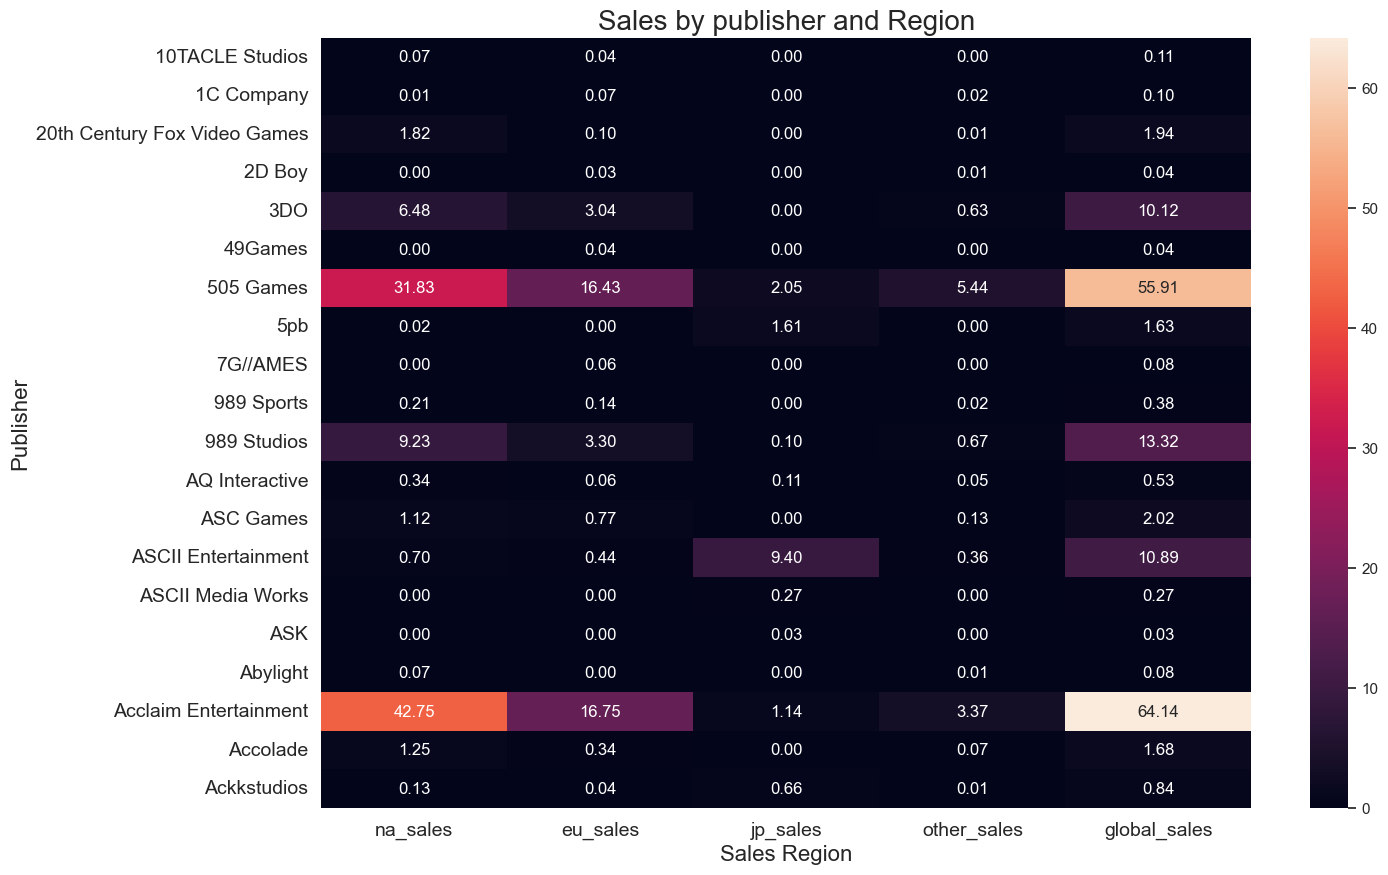

In [24]:
#sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_publisher, annot=True, fmt='.2f', ax=ax)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel('Sales Region', fontsize=16)
ax.set_ylabel('Publisher', fontsize=16)
ax.set_title('Sales by publisher and Region', fontsize=20)

plt.show()

In [25]:
comp_publisher = df[['publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','global_sales']]
comp_publisher = comp_publisher.groupby(by=['publisher']).sum().reset_index().sort_values(by=['global_sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
comp_publisher = pd.melt(comp_publisher, id_vars=['publisher'], value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], var_name='sale_area', value_name='sale_price')

comp_publisher

,publisher,sale_area,sale_price
0,Nintendo,na_sales,816.87
1,Electronic Arts,na_sales,595.07
2,Activision,na_sales,429.70
3,Sony Computer Entertainment,na_sales,265.22
4,Ubisoft,na_sales,253.43
...,...,...,...
75,Disney Interactive Studios,other_sales,13.18
76,Eidos Interactive,other_sales,8.02
77,LucasArts,other_sales,10.50
78,Bethesda Softworks,other_sales,10.16


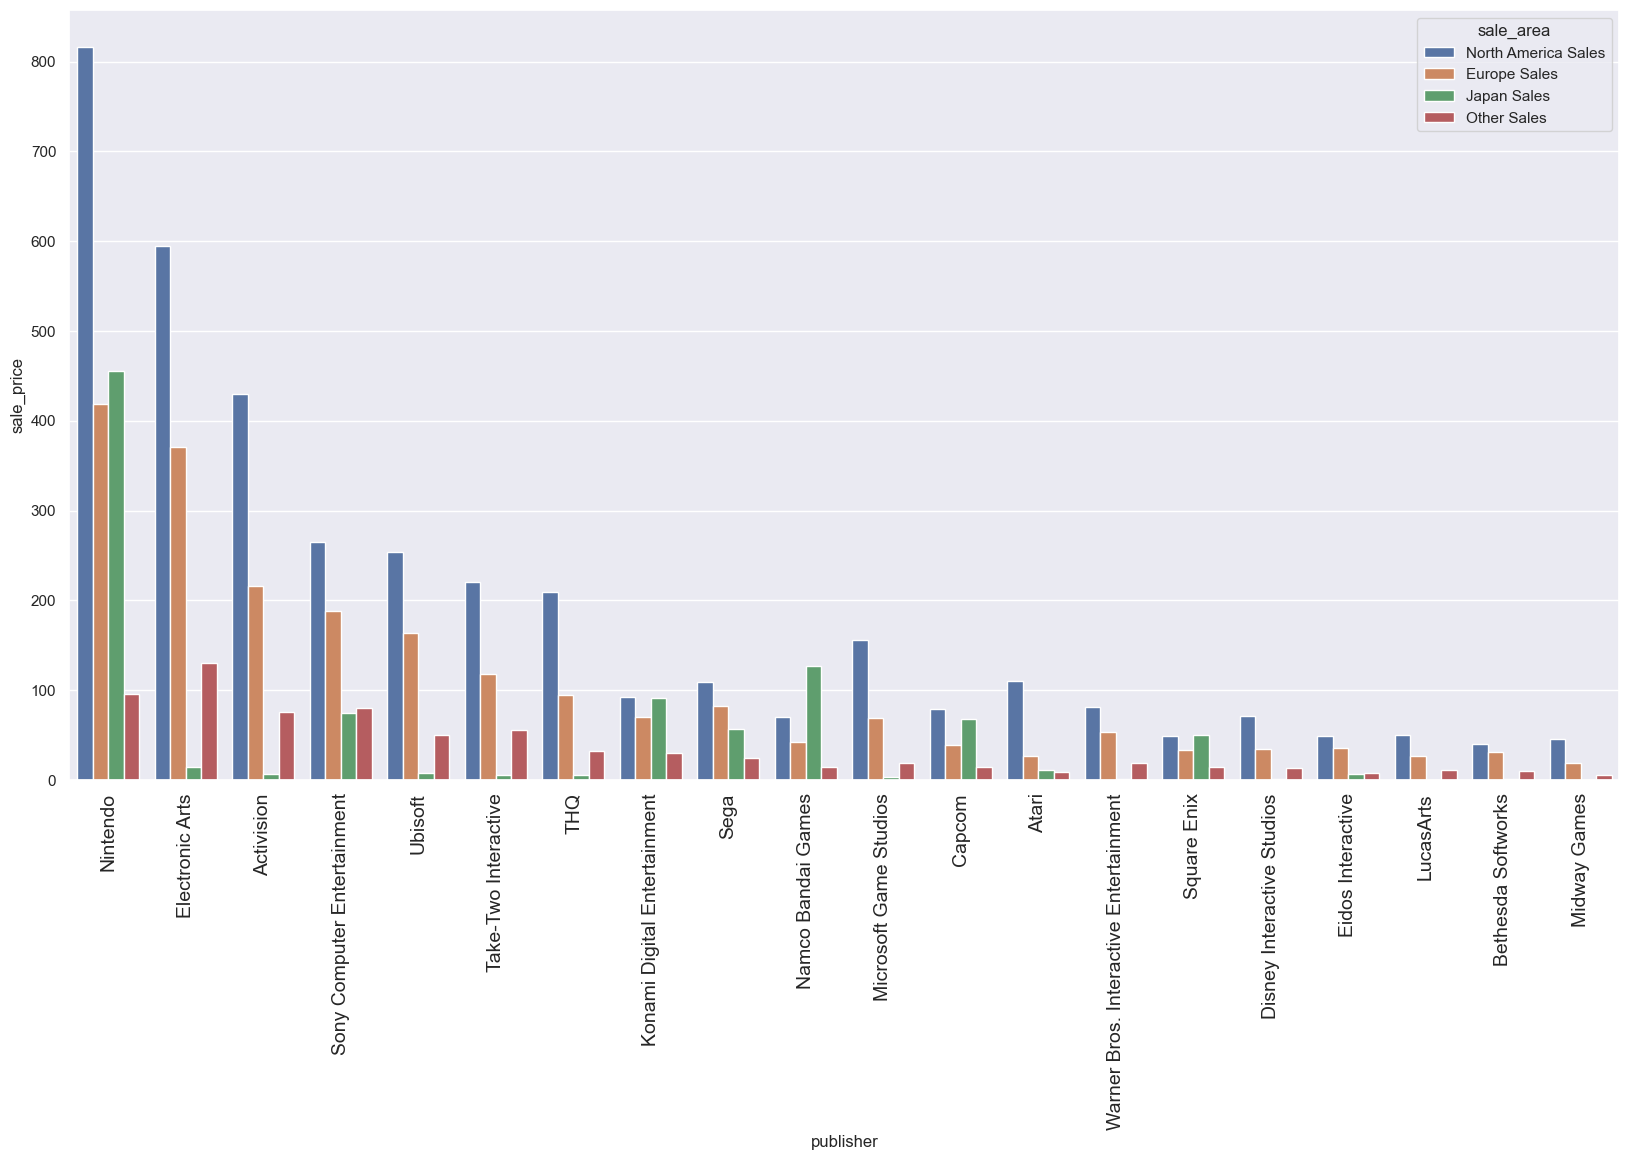

In [26]:
plt.figure(figsize=(20, 10))
chart = sns.barplot(x='publisher', y='sale_price', hue='sale_area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)

new_labels = ['North America Sales', 'Europe Sales', 'Japan Sales', 'Other Sales']
for t, l in zip(chart.legend_.texts, new_labels): t.set_text(l)

plt.show()


In [27]:
df_year_publisher = (df.groupby(['year', 'publisher']).size()
                       .reset_index(name='Count')
                       .loc[lambda df: df.groupby('year')['Count'].idxmax()]
                       .drop_duplicates(['year', 'Count'], keep='last')
                       .reset_index(drop=True))
df_year_publisher['year'] = df_year_publisher['year'].astype(int)

drop_row_index = df_year_publisher[df_year_publisher['year'] > 2015].index
df_year_publisher = df_year_publisher.drop(drop_row_index)

df_year_publisher.tail()

,year,publisher,Count
31,2011,Ubisoft,87
32,2012,Namco Bandai Games,85
33,2013,Namco Bandai Games,63
34,2014,Namco Bandai Games,69
35,2015,Namco Bandai Games,68


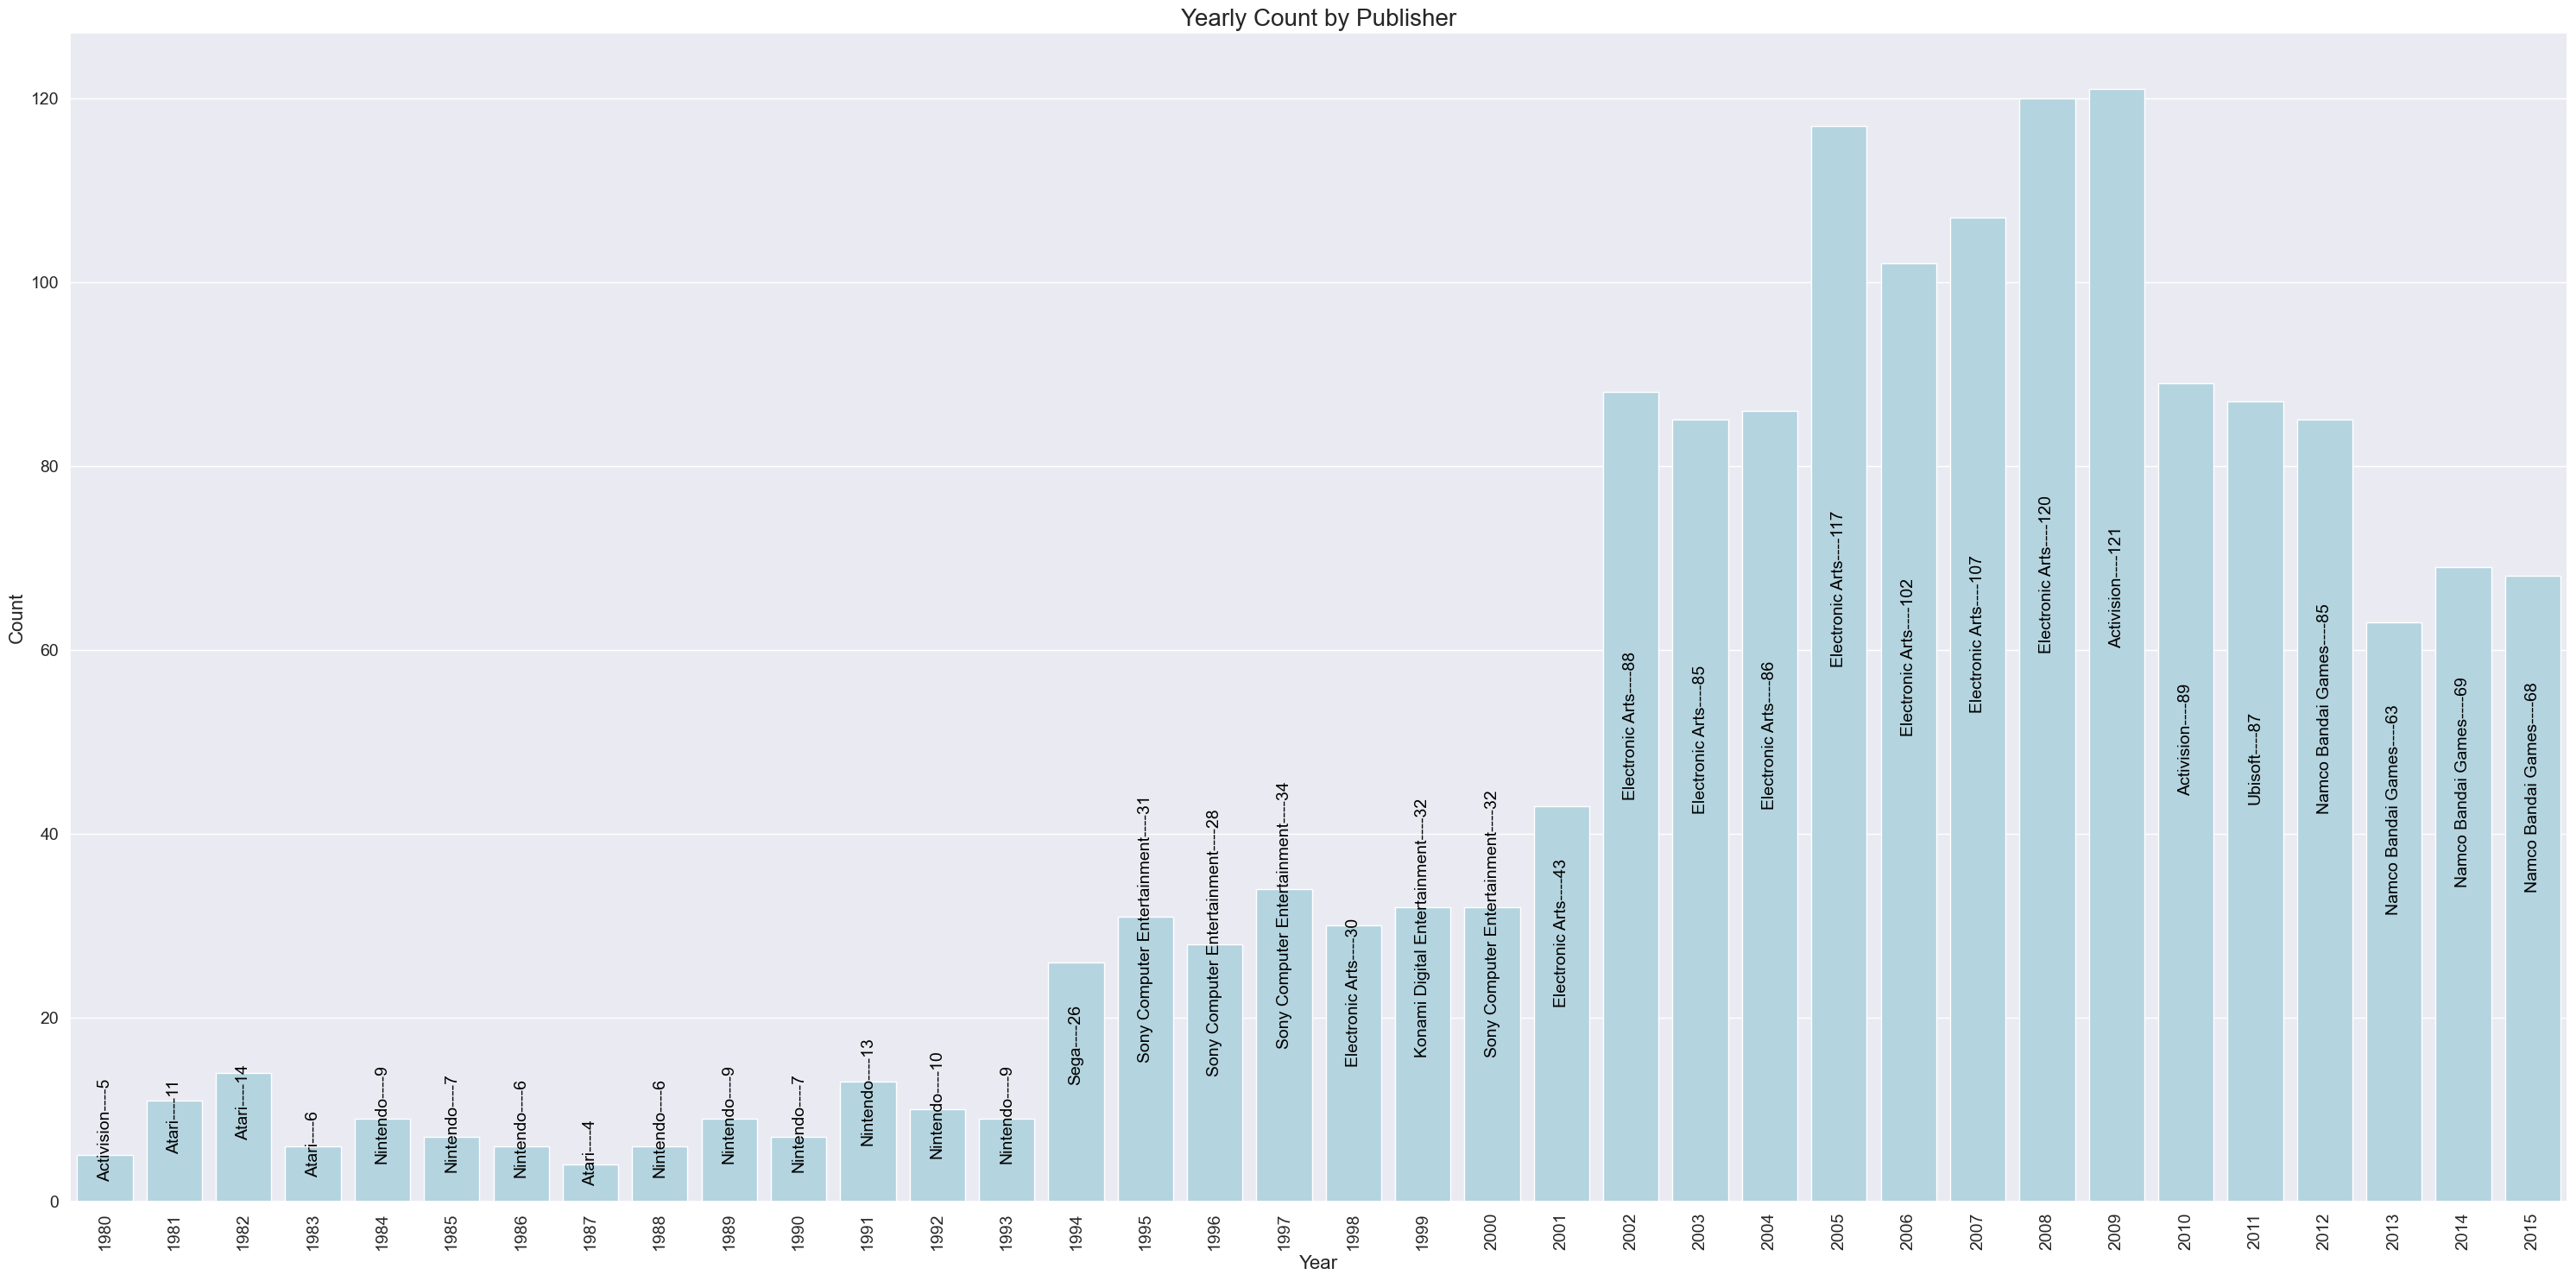

In [28]:
publisher = df_year_publisher['publisher']
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x='year', y='Count', data=df_year_publisher, ax=ax, color='lightblue', label='Global Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Publisher')
ax.set_ylabel('Global Sales')

for i, value in enumerate(df_year_publisher['Count'].values):
    ax.text(i, value / 2, f'{publisher[i]}----{value}', color='black', size=14, rotation=90, ha='center')

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Yearly Count by Publisher', fontsize=20)

plt.tight_layout()
plt.show()


In [29]:
df_sales = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().rename_axis('region').reset_index(name='sale')
df_sales

,region,sale
0,na_sales,4392.95
1,eu_sales,2434.13
2,jp_sales,1291.02
3,other_sales,797.75


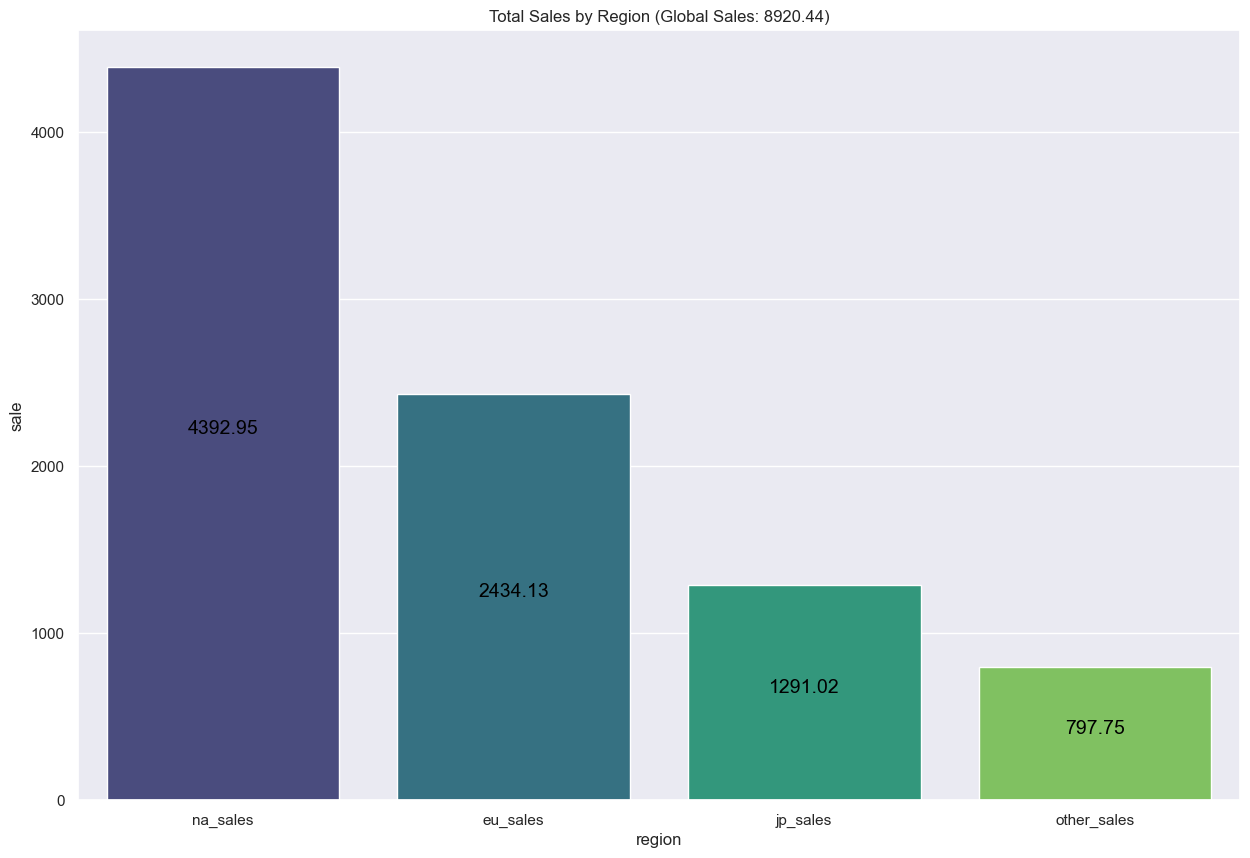

In [30]:
df_sales = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().rename_axis('region').reset_index(name='sale')
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x='region', y='sale', data=df_sales, ax=ax, palette='viridis')

total_global_sales= df['global_sales'].sum()
for i, value in enumerate(df_sales['sale'].values):
    ax.text(i, value / 2, f'{value:.2f}', color='black', size=14, ha='center')

ax.set_title(f'Total Sales by Region (Global Sales: {total_global_sales:.2f})')

plt.show()